👪 여행자 구성 기반 분석, 🧒 자녀 동반 여부, 🏠 숙박 유형과 여행 스타일, 🚗 이동수단/교통비 기반 분류, 🎡 여행지 성격과 행동 연결

In [76]:
import pandas as pd

pre_con = pd.read_csv('tn_adv_consume_his_사전소비내역_B.csv')
pre_con.head()

,TRAVEL_ID,ADV_NM,ADV_SEQ,PAYMENT_NUM,BRNO,STORE_NM,ROAD_NM_ADDR,LOTNO_ADDR,ROAD_NM_CD,LOTNO_CD,PAYMENT_DT,PAYMENT_MTHD_SE,PAYMENT_AMT_WON,PAYMENT_ETC,SGG_CD
0,b_b004151,음료수,0,3,NaN,이마트 검단점,NaN,NaN,NaN,NaN,NaN,1.0,5780,음료수,2.826011e+09
1,b_b016253,식품,1,3,NaN,홈플러스,NaN,NaN,NaN,NaN,2022-11-03 07:50:00.000,1.0,86760,신선 특란 30개입 외 22건,NaN
2,b_b007535,식품,2,3,7.589901e+09,경성수산센터,부산 남구 용소로8번길 17,부산 남구 대연동 68-7,4193212.0,2.629011e+09,2022-10-22 15:17:00.000,1.0,31000,모듬회,NaN
3,b_b010037,버스표,1,1,6.058122e+09,부산서부버스터미날주식회사,부산 사상구 광장로21번길 20,부산 사상구 괘법동 532-1,4217042.0,2.653010e+09,2022-10-30 08:14:00.000,1.0,12400,버스비,NaN
4,b_b001032,식품,0,5,NaN,다농엘마트,NaN,NaN,NaN,NaN,NaN,1.0,176530,소고기 등 여러 취식음식물,4.311314e+09


In [77]:
id = {
    "TRAVEL_ID": "여행ID",
    "ADV_NM": "구매내역",
    "ADV_SEQ": "구매순번",
    "PAYMENT_NUM": "소비인원",
    "BRNO": "사업자등록번호",
    "STORE_NM": "상호명",
    "ROAD_NM_ADDR": "도로명주소",
    "LOTNO_ADDR": "지번주소",
    "ROAD_NM_CD": "도로명코드",
    "LOTNO_CD": "지번코드",
    "PAYMENT_DT": "결제일시분",
    "PAYMENT_MTHD_SE": "결제수단구분",      ## PAY
    "PAYMENT_AMT_WON": "결제금액_원",
    "PAYMENT_ETC": "소비내역_기타",
    "SGG_CD": "시군구코드"
}

pre_con.rename(columns=id, inplace=True)
pre_con.head()

,여행ID,구매내역,구매순번,소비인원,사업자등록번호,상호명,도로명주소,지번주소,도로명코드,지번코드,결제일시분,결제수단구분,결제금액_원,소비내역_기타,시군구코드
0,b_b004151,음료수,0,3,NaN,이마트 검단점,NaN,NaN,NaN,NaN,NaN,1.0,5780,음료수,2.826011e+09
1,b_b016253,식품,1,3,NaN,홈플러스,NaN,NaN,NaN,NaN,2022-11-03 07:50:00.000,1.0,86760,신선 특란 30개입 외 22건,NaN
2,b_b007535,식품,2,3,7.589901e+09,경성수산센터,부산 남구 용소로8번길 17,부산 남구 대연동 68-7,4193212.0,2.629011e+09,2022-10-22 15:17:00.000,1.0,31000,모듬회,NaN
3,b_b010037,버스표,1,1,6.058122e+09,부산서부버스터미날주식회사,부산 사상구 광장로21번길 20,부산 사상구 괘법동 532-1,4217042.0,2.653010e+09,2022-10-30 08:14:00.000,1.0,12400,버스비,NaN
4,b_b001032,식품,0,5,NaN,다농엘마트,NaN,NaN,NaN,NaN,NaN,1.0,176530,소고기 등 여러 취식음식물,4.311314e+09


c:\Users\hanaj\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hanaj\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hanaj\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hanaj\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hanaj\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io,

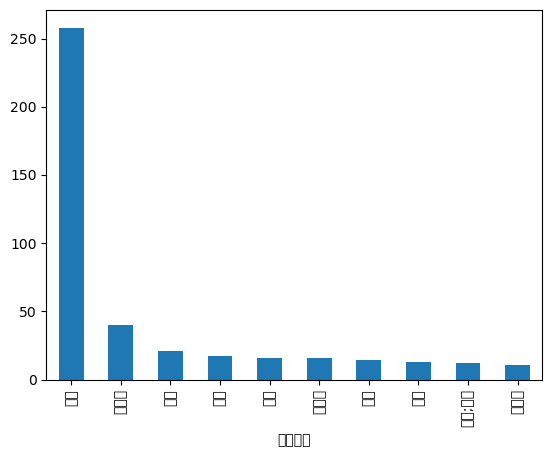

In [78]:
## 소비내역
import matplotlib.pyplot as plt

pre_con['구매내역'].value_counts().head(10).plot(kind='bar')
plt.show()

In [79]:
import pandas as pd

com = pd.read_csv('tn_companion_info_동반자정보_B.csv')
com.head()

,COMPANION_SEQ,TRAVEL_ID,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP,COMPANION_SITUATION
0,1,b_b002151,1,1,6,1
1,5,b_b004786,6,2,4,3
2,1,b_b002864,1,1,7,1
3,1,b_b011077,2,2,1,1
4,3,b_b000838,2,1,1,1


In [80]:
id = {
    "COMPANION_SEQ": "동반자순번",
    "TRAVEL_ID": "여행ID",
    "REL_CD": "동반자관계코드",                  ## TCR
    "COMPANION_GENDER": "동반자성별",           ## GEN
    "COMPANION_AGE_GRP": "동반자연령대",        ## AGE
    "COMPANION_SITUATION": "동반자동반상황"     ## CST
}

com.rename(columns=id, inplace=True)
com.head()

,동반자순번,여행ID,동반자관계코드,동반자성별,동반자연령대,동반자동반상황
0,1,b_b002151,1,1,6,1
1,5,b_b004786,6,2,4,3
2,1,b_b002864,1,1,7,1
3,1,b_b011077,2,2,1,1
4,3,b_b000838,2,1,1,1


In [81]:
import pandas as pd

code_A = pd.read_csv('tc_codea_코드A.csv')
code_B = pd.read_csv('tc_codeb_코드B.csv')

code_A.head()

,idx,cd_nm,cd_a,cd_memo,cd_memo2,del_flag,order_num,perm_write,perm_edit,perm_delete,ins_dt,edit_dt
0,5,여행상태,STA,NaN,NaN,N,999,N,N,N,2022-07-05 10:33:02.000,NaN
1,6,방문지유형코드,VIS,NaN,NaN,N,999,N,N,N,2022-07-05 10:45:53.000,NaN
2,7,주요 이동수단,MOV,NaN,NaN,N,999,N,N,N,2022-07-05 10:48:39.000,NaN
3,8,재방문여부,REV,NaN,NaN,N,999,N,N,N,2022-07-05 11:27:33.000,NaN
4,9,방문선택이유,REN,NaN,NaN,N,999,N,N,N,2022-07-05 11:28:18.000,NaN


In [82]:
code_B.head()

,idx,cd_nm,cd_a,cd_b,cd_memo,cd_memo2,del_flag,order_num,ins_dt,edit_dt
0,992,최초 로그인,STA,11,NaN,NaN,N,999,2022-07-05 10:37:07.000,NaN
1,993,테스트 사진 업로드,STA,12,NaN,NaN,N,999,2022-07-05 10:40:24.000,NaN
2,994,예정여행지변경신청,STA,13,NaN,NaN,N,999,2022-07-05 10:44:25.000,NaN
3,995,예정여행지변경승인,STA,14,NaN,NaN,N,999,2022-07-05 10:44:32.000,NaN
4,996,여행 중,STA,20,NaN,NaN,N,999,2022-07-05 10:44:38.000,NaN


In [85]:
code_B[code_B['cd_a'] == 'EXP']

,idx,cd_nm,cd_a,cd_b,cd_memo,cd_memo2,del_flag,order_num,ins_dt,edit_dt
69,1061,이 방문지에서 구매,EXP,1,NaN,NaN,N,999,2022-07-05 11:50:43.000,NaN
70,1062,이 방문지로 이동 중 구매/ 이 방문지로 배달,EXP,2,NaN,NaN,N,999,2022-07-05 11:50:49.000,2022-07-25 16:27:03.000
71,1063,여행 출발 전 거주지 인근에서 미리 구매,EXP,3,NaN,NaN,N,999,2022-07-05 11:50:56.000,NaN
72,1064,비용 발생하지 않음,EXP,4,NaN,NaN,N,999,2022-07-05 11:51:01.000,NaN


In [43]:
# ## 동반자와의 관계
# relation_map = code_B[code_B['cd_a']=='TCR'][['cd_b', 'cd_nm']]
# relation_map['cd_b'] = relation_map['cd_b'].astype(int)
# merge_relation = com.merge(relation_map, left_on='동반자관계코드', right_on='cd_b', how='left')
# merge_relation = merge_relation.drop(columns=['cd_b'])
# merge_relation = merge_relation.rename(columns={'cd_nm': '동반자와의관계'})
# merge_relation

In [74]:
print(pre_con.head())
print(com.head())

        여행ID 구매내역  구매순번  소비인원       사업자등록번호            상호명              도로명주소  \
0  b_b004151  음료수     0     3           NaN        이마트 검단점                NaN   
1  b_b016253   식품     1     3           NaN           홈플러스                NaN   
2  b_b007535   식품     2     3  7.589901e+09         경성수산센터    부산 남구 용소로8번길 17   
3  b_b010037  버스표     1     1  6.058122e+09  부산서부버스터미날주식회사  부산 사상구 광장로21번길 20   
4  b_b001032   식품     0     5           NaN          다농엘마트                NaN   

               지번주소      도로명코드          지번코드                    결제일시분  결제수단구분  \
0               NaN        NaN           NaN                      NaN     1.0   
1               NaN        NaN           NaN  2022-11-03 07:50:00.000     1.0   
2    부산 남구 대연동 68-7  4193212.0  2.629011e+09  2022-10-22 15:17:00.000     1.0   
3  부산 사상구 괘법동 532-1  4217042.0  2.653010e+09  2022-10-30 08:14:00.000     1.0   
4               NaN        NaN           NaN                      NaN     1.0   

   결제금액_원           소비내역_기

In [83]:
def dic_map(table, code, col):
    code_map = code_B[code_B['cd_a']== code][['cd_b', 'cd_nm']]
    code_map['cd_b'] = code_map['cd_b'].astype(int)
    code_dic = code_map.set_index('cd_b')['cd_nm'].to_dict()
    table[col] = table[col].astype("Int64").map(code_dic)
    return table
    

pre_con = dic_map(pre_con, 'PAY', '결제수단구분')
com = dic_map(com, 'TCR', '동반자관계코드')
com = dic_map(com, 'GEN', '동반자성별')
com = dic_map(com, 'AGE', '동반자연령대')
com = dic_map(com, 'CST', '동반자동반상황')

pre_con




,여행ID,구매내역,구매순번,소비인원,사업자등록번호,상호명,도로명주소,지번주소,도로명코드,지번코드,결제일시분,결제수단구분,결제금액_원,소비내역_기타,시군구코드
0,b_b004151,음료수,0,3,NaN,이마트 검단점,NaN,NaN,NaN,NaN,NaN,카드 일시불,5780,음료수,2.826011e+09
1,b_b016253,식품,1,3,NaN,홈플러스,NaN,NaN,NaN,NaN,2022-11-03 07:50:00.000,카드 일시불,86760,신선 특란 30개입 외 22건,NaN
2,b_b007535,식품,2,3,7.589901e+09,경성수산센터,부산 남구 용소로8번길 17,부산 남구 대연동 68-7,4193212.0,2.629011e+09,2022-10-22 15:17:00.000,카드 일시불,31000,모듬회,NaN
3,b_b010037,버스표,1,1,6.058122e+09,부산서부버스터미날주식회사,부산 사상구 광장로21번길 20,부산 사상구 괘법동 532-1,4217042.0,2.653010e+09,2022-10-30 08:14:00.000,카드 일시불,12400,버스비,NaN
4,b_b001032,식품,0,5,NaN,다농엘마트,NaN,NaN,NaN,NaN,NaN,카드 일시불,176530,소고기 등 여러 취식음식물,4.311314e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,b_b011685,식품,0,3,NaN,곰식자재마트,NaN,NaN,NaN,NaN,NaN,현금,23600,라면;과자,4.729025e+09
871,b_b002556,CJ슈퍼레이스 관람권 예매,1,1,2.298137e+09,예스이십사(주),서울 영등포구 은행로 11,서울 영등포구 여의도동 15-15,3118025.0,1.156011e+09,2022-08-18 19:34:00.000,카드 일시불,10300,2022 CJ대한통운 슈퍼레이스 챔피언십 ROUND.5,NaN
872,b_b007906,기차표,1,2,3.148210e+09,한국철도공사,대전 동구 중앙로 240,대전 동구 소제동 293-74,3164033.0,3.011011e+09,2022-10-10 14:07:00.000,카드 일시불,11400,청량리역-가평역 기차표(itx-청춘),NaN
873,b_b003018,음료;담배,0,4,NaN,CU,NaN,NaN,NaN,NaN,NaN,카드 일시불,9500,음료;담배,4.115011e+09


In [84]:
com

,동반자순번,여행ID,동반자관계코드,동반자성별,동반자연령대,동반자동반상황
0,1,b_b002151,배우자,남자,50대,계속 함께 여행
1,5,b_b004786,친인척,여자,30대,여행 중 합류
2,1,b_b002864,배우자,남자,60대,계속 함께 여행
3,1,b_b011077,자녀,여자,~9세이하,계속 함께 여행
4,3,b_b000838,자녀,남자,~9세이하,계속 함께 여행
...,...,...,...,...,...,...
4927,2,b_b007950,부모,여자,70세이상,계속 함께 여행
4928,2,b_b004623,친구,여자,20대,계속 함께 여행
4929,4,b_b010803,자녀,남자,30대,계속 함께 여행
4930,3,b_b000064,친구,여자,30대,계속 함께 여행


In [51]:
pay_map = code_B[code_B['cd_a']=='PAY'][['cd_b', 'cd_nm']]
pay_map['cd_b'] = pay_map['cd_b'].astype(int)
pay_dic = pay_map.set_index('cd_b')['cd_nm'].to_dict()
pre_con['결제수단구분'] = pre_con['결제수단구분'].astype("Int64").map(pay_dic)
pre_con

,여행ID,구매내역,구매순번,소비인원,사업자등록번호,상호명,도로명주소,지번주소,도로명코드,지번코드,결제일시분,결제수단구분,결제금액_원,소비내역_기타,시군구코드
0,b_b004151,음료수,0,3,NaN,이마트 검단점,NaN,NaN,NaN,NaN,NaN,카드 일시불,5780,음료수,2.826011e+09
1,b_b016253,식품,1,3,NaN,홈플러스,NaN,NaN,NaN,NaN,2022-11-03 07:50:00.000,카드 일시불,86760,신선 특란 30개입 외 22건,NaN
2,b_b007535,식품,2,3,7.589901e+09,경성수산센터,부산 남구 용소로8번길 17,부산 남구 대연동 68-7,4193212.0,2.629011e+09,2022-10-22 15:17:00.000,카드 일시불,31000,모듬회,NaN
3,b_b010037,버스표,1,1,6.058122e+09,부산서부버스터미날주식회사,부산 사상구 광장로21번길 20,부산 사상구 괘법동 532-1,4217042.0,2.653010e+09,2022-10-30 08:14:00.000,카드 일시불,12400,버스비,NaN
4,b_b001032,식품,0,5,NaN,다농엘마트,NaN,NaN,NaN,NaN,NaN,카드 일시불,176530,소고기 등 여러 취식음식물,4.311314e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,b_b011685,식품,0,3,NaN,곰식자재마트,NaN,NaN,NaN,NaN,NaN,현금,23600,라면;과자,4.729025e+09
871,b_b002556,CJ슈퍼레이스 관람권 예매,1,1,2.298137e+09,예스이십사(주),서울 영등포구 은행로 11,서울 영등포구 여의도동 15-15,3118025.0,1.156011e+09,2022-08-18 19:34:00.000,카드 일시불,10300,2022 CJ대한통운 슈퍼레이스 챔피언십 ROUND.5,NaN
872,b_b007906,기차표,1,2,3.148210e+09,한국철도공사,대전 동구 중앙로 240,대전 동구 소제동 293-74,3164033.0,3.011011e+09,2022-10-10 14:07:00.000,카드 일시불,11400,청량리역-가평역 기차표(itx-청춘),NaN
873,b_b003018,음료;담배,0,4,NaN,CU,NaN,NaN,NaN,NaN,NaN,카드 일시불,9500,음료;담배,4.115011e+09


In [44]:
relation_map = code_B[code_B['cd_a']=='TCR'][['cd_b', 'cd_nm']]
relation_map['cd_b'] = relation_map['cd_b'].astype(int)
relation_dic = relation_map.set_index('cd_b')['cd_nm'].to_dict()
relation_dic[0] = '혼자여행'
com['동반자관계코드'] = com['동반자관계코드'].astype("Int64").map(relation_dic)
com

,동반자순번,여행ID,동반자관계코드,동반자성별,동반자연령대,동반자동반상황
0,1,b_b002151,배우자,1,6,1
1,5,b_b004786,친인척,2,4,3
2,1,b_b002864,배우자,1,7,1
3,1,b_b011077,자녀,2,1,1
4,3,b_b000838,자녀,1,1,1
...,...,...,...,...,...,...
4927,2,b_b007950,부모,2,8,1
4928,2,b_b004623,친구,2,3,1
4929,4,b_b010803,자녀,1,4,1
4930,3,b_b000064,친구,2,4,1


In [45]:
sex_map = code_B[code_B['cd_a']=='GEN'][['cd_b', 'cd_nm']]
sex_map['cd_b'] = sex_map['cd_b'].astype(int)
sex_dic = sex_map.set_index('cd_b')['cd_nm'].to_dict()
com['동반자성별'] = com['동반자성별'].astype("Int64").map(sex_dic)
com

,동반자순번,여행ID,동반자관계코드,동반자성별,동반자연령대,동반자동반상황
0,1,b_b002151,배우자,남자,6,1
1,5,b_b004786,친인척,여자,4,3
2,1,b_b002864,배우자,남자,7,1
3,1,b_b011077,자녀,여자,1,1
4,3,b_b000838,자녀,남자,1,1
...,...,...,...,...,...,...
4927,2,b_b007950,부모,여자,8,1
4928,2,b_b004623,친구,여자,3,1
4929,4,b_b010803,자녀,남자,4,1
4930,3,b_b000064,친구,여자,4,1


In [48]:
age_map = code_B[code_B['cd_a']=='AGE'][['cd_b', 'cd_nm']]
age_map['cd_b'] = age_map['cd_b'].astype(int)
age_dic = age_map.set_index('cd_b')['cd_nm'].to_dict()
com['동반자연령대'] = com['동반자연령대'].astype("Int64").map(age_dic)
com

,동반자순번,여행ID,동반자관계코드,동반자성별,동반자연령대,동반자동반상황
0,1,b_b002151,배우자,남자,50대,1
1,5,b_b004786,친인척,여자,30대,3
2,1,b_b002864,배우자,남자,60대,1
3,1,b_b011077,자녀,여자,~9세이하,1
4,3,b_b000838,자녀,남자,~9세이하,1
...,...,...,...,...,...,...
4927,2,b_b007950,부모,여자,70세이상,1
4928,2,b_b004623,친구,여자,20대,1
4929,4,b_b010803,자녀,남자,30대,1
4930,3,b_b000064,친구,여자,30대,1


In [50]:
sit_map = code_B[code_B['cd_a']=='CST'][['cd_b', 'cd_nm']]
sit_map['cd_b'] = sit_map['cd_b'].astype(int)
sit_dic = sit_map.set_index('cd_b')['cd_nm'].to_dict()
com['동반자동반상황'] = com['동반자동반상황'].astype("Int64").map(sit_dic)
com

,동반자순번,여행ID,동반자관계코드,동반자성별,동반자연령대,동반자동반상황
0,1,b_b002151,배우자,남자,50대,계속 함께 여행
1,5,b_b004786,친인척,여자,30대,여행 중 합류
2,1,b_b002864,배우자,남자,60대,계속 함께 여행
3,1,b_b011077,자녀,여자,~9세이하,계속 함께 여행
4,3,b_b000838,자녀,남자,~9세이하,계속 함께 여행
...,...,...,...,...,...,...
4927,2,b_b007950,부모,여자,70세이상,계속 함께 여행
4928,2,b_b004623,친구,여자,20대,계속 함께 여행
4929,4,b_b010803,자녀,남자,30대,계속 함께 여행
4930,3,b_b000064,친구,여자,30대,계속 함께 여행


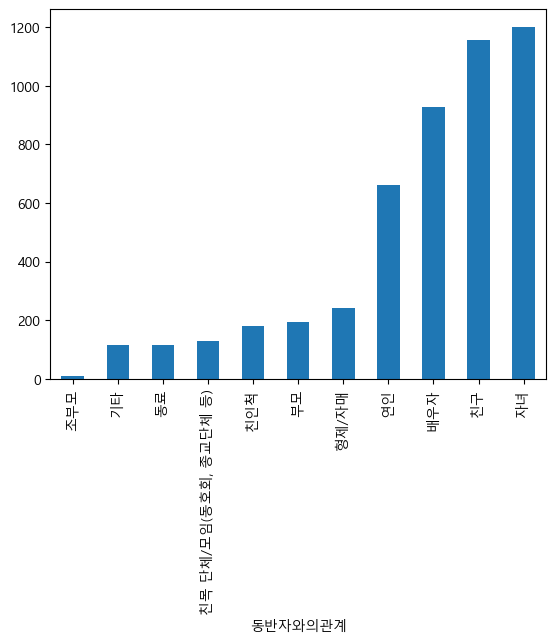

In [12]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 윈도우 기준: 'Malgun Gothic' 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 만약 한글이 겹쳐보이면 마이너스(-) 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

merge_relation['동반자와의관계'].value_counts().sort_values().plot(kind='bar')
plt.show()

In [13]:
## 동반자연령대
age_map = code_B[code_B['cd_a'] == 'AGE'][['cd_b','cd_nm']]
age_map['cd_b'] = age_map['cd_b'].astype(int)
merge_com = com.merge(age_map, left_on='동반자연령대', right_on='cd_b', how='left')
merge_com = merge_com.drop(columns=['cd_b'])
merge_com = merge_com.rename(columns={'cd_nm': "동반자연령대_나이"})
merge_com



,동반자순번,여행ID,동반자관계코드,동반자성별,동반자연령대,동반자동반상황,동반자연령대_나이
0,1,b_b002151,1,1,6,1,50대
1,5,b_b004786,6,2,4,3,30대
2,1,b_b002864,1,1,7,1,60대
3,1,b_b011077,2,2,1,1,~9세이하
4,3,b_b000838,2,1,1,1,~9세이하
...,...,...,...,...,...,...,...
4927,2,b_b007950,3,2,8,1,70세이상
4928,2,b_b004623,7,2,3,1,20대
4929,4,b_b010803,2,1,4,1,30대
4930,3,b_b000064,7,2,4,1,30대


In [14]:
merge_com['동반자연령대_나이'].value_counts()

동반자연령대_나이
30대      1327
20대      1240
40대       676
~9세이하     655
10대       369
50대       356
60대       219
70세이상      90
Name: count, dtype: int64